In [1]:
%load_ext lab_black

In [2]:
import os
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
from cfg.convert_cfg_to_yaml import save_myyaml_from_mycfg
from Data import Data_eval
from include.loss import pixel_weighted_cross_entropy
import model_eval
import models.reg as rm


import matplotlib_functions as mympf

mympf.setMatplotlibParam()
plt.viridis()

dir_res = "/cerea_raid/users/dumontj/dev/coco2/dl/res"

2023-05-10 17:51:35.351579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

In [3]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/weights/box/best_no2"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"

### On extra_valid data

In [4]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_best.h5"
)

2023-05-10 17:51:45.855614: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 17:51:46.434069: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14349 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [5]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

2023-05-10 17:51:48.161716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-05-10 17:51:48.723473: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 5ms/step
mae: 5.940708
mape: 30.630844


197/197 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

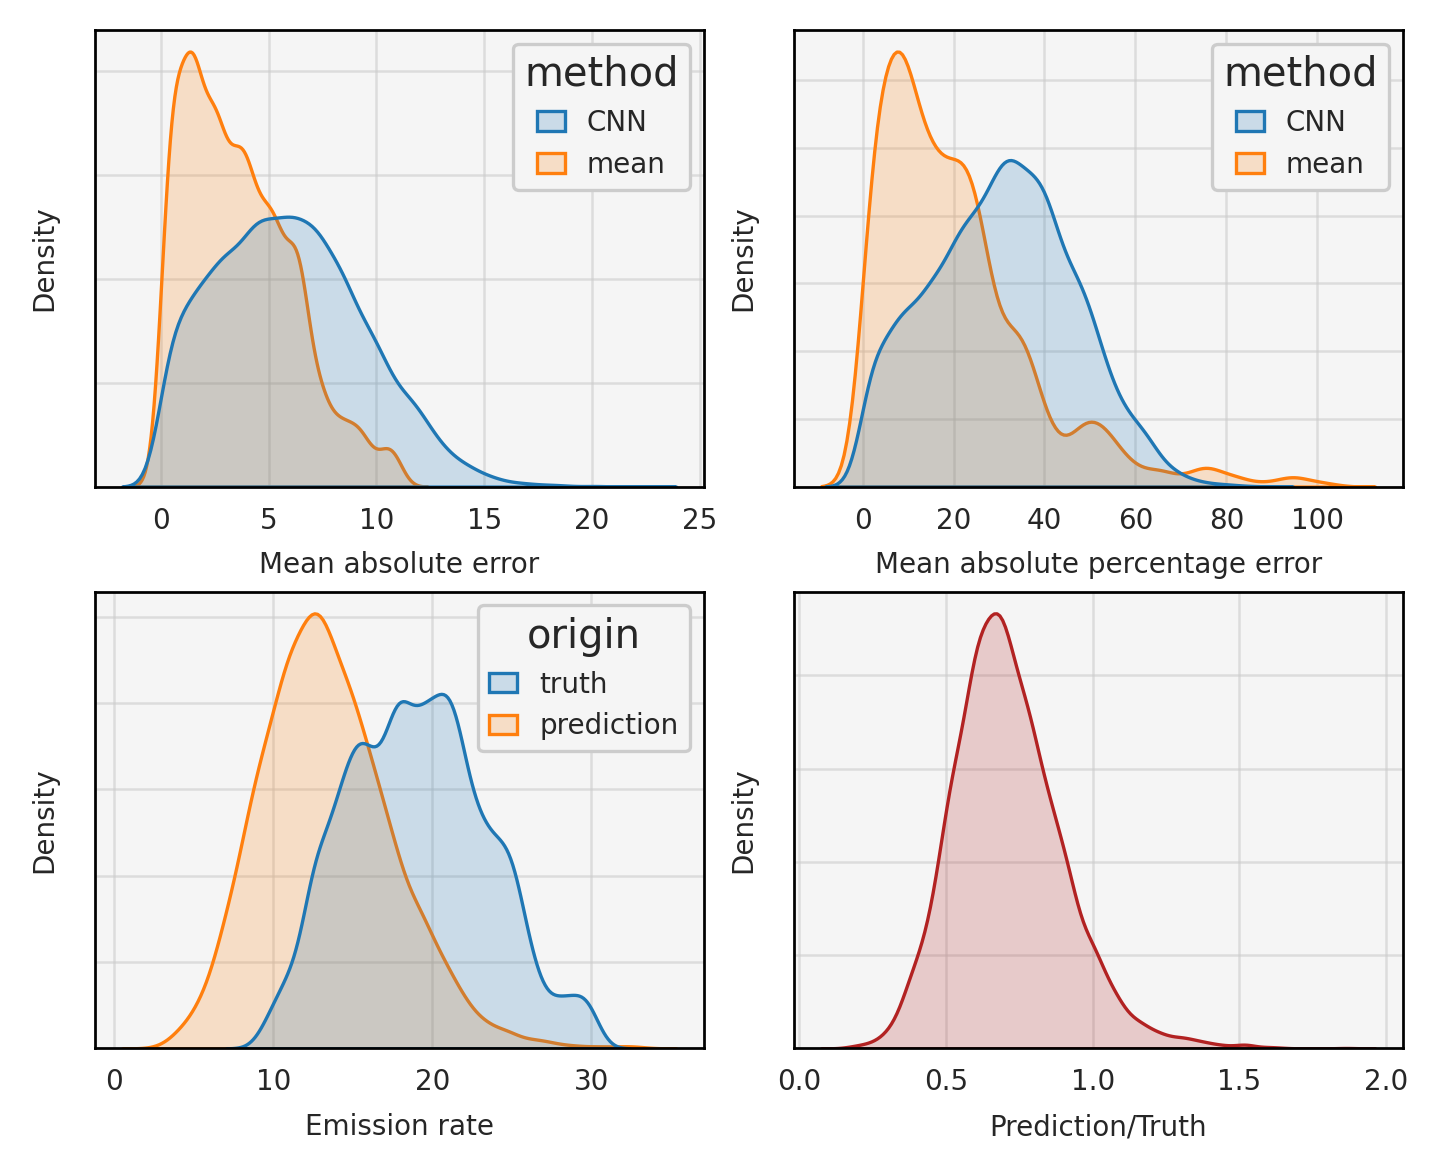

In [6]:
model_eval.get_summary_histo_inversion(model, data)

### On validation dataset

In [29]:
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_Jan/valid_dataset.nc"

In [30]:
data_val = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_valid_nc,
)

In [31]:
metrics_val = model_eval.get_inv_metrics_model_on_data(model, data_val)
print("mae:", np.mean(metrics_val["mae"]))
print("mape:", np.mean(metrics_val["mape"]))

36/36 [==============================] - 0s 4ms/step
mae: 5.841028
mape: 17.089277


36/36 [==============================] - 0s 4ms/step


<Figure size 1920x1440 with 0 Axes>

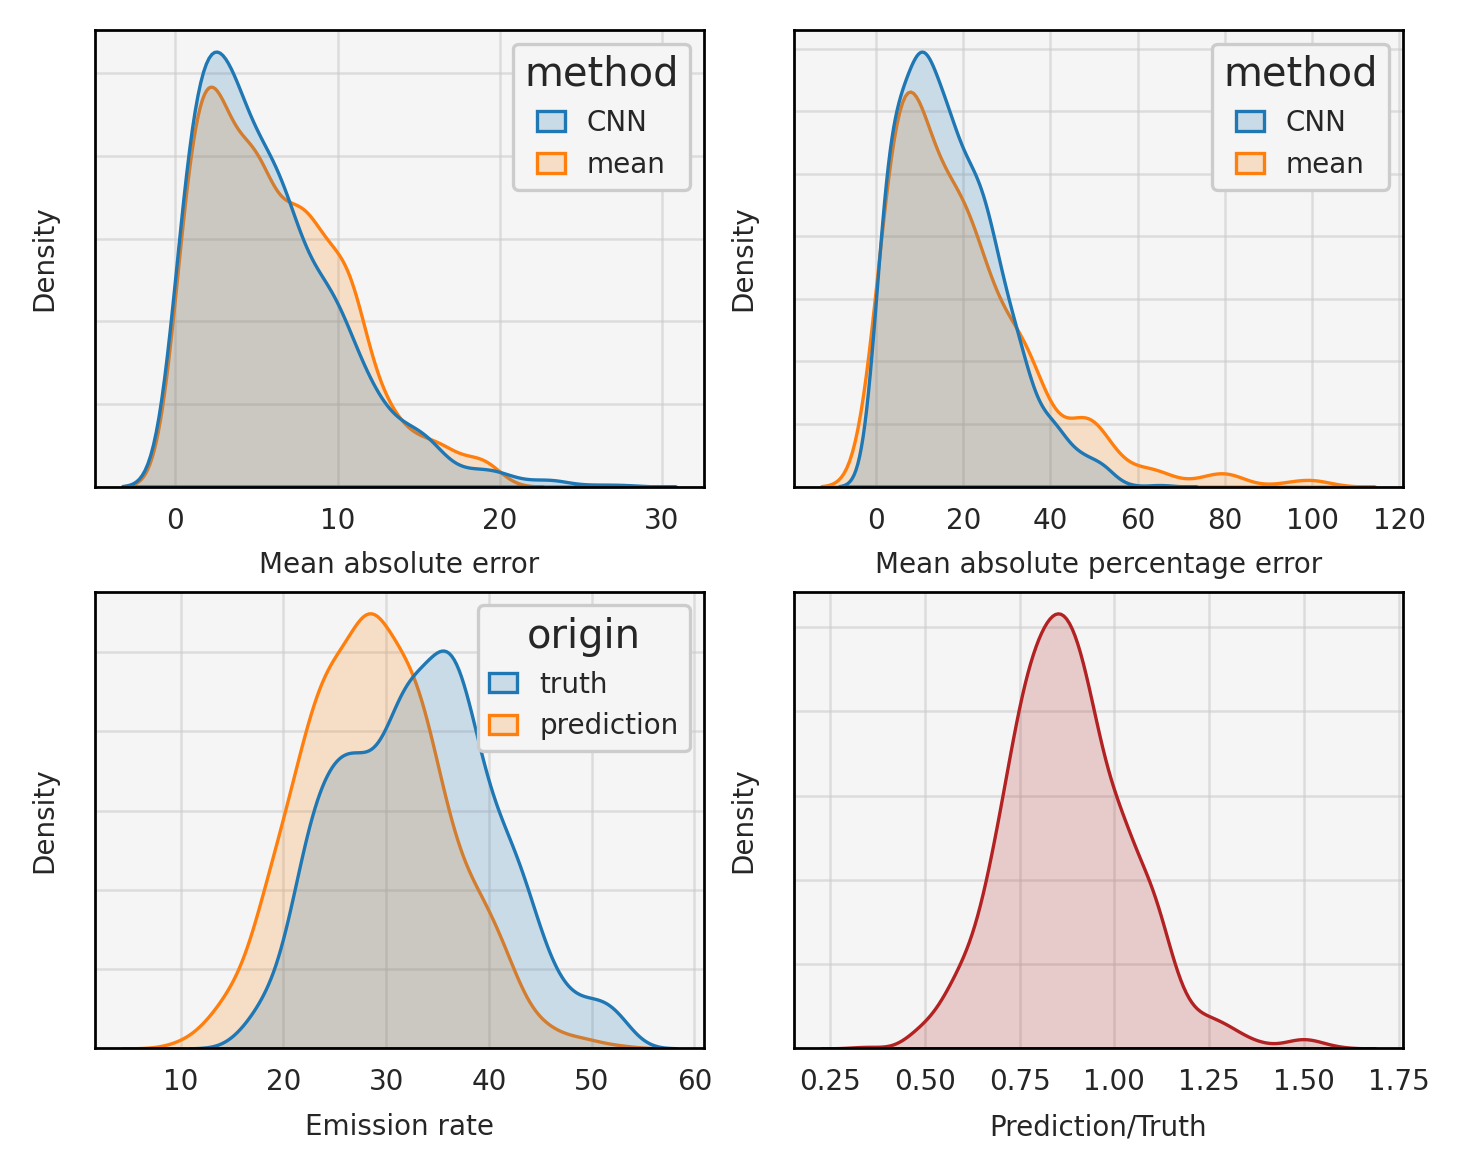

In [32]:
model_eval.get_summary_histo_inversion(model, data_val)

In [33]:
name_model = "/cerea_raid/users/dumontj/dev/coco2/dl/weights/box/8"
path_eval_nc = "/libre/dumontj/coco2/dl-input/2km_Box/train_dataset.nc"
path_valid_nc = "/libre/dumontj/coco2/dl-input/2km_forBox_2/valid_dataset.nc"

### On extra_valid data

In [34]:
data = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_best.h5"
)

In [35]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

197/197 [==============================] - 1s 4ms/step
mae: 8.507347
mape: 43.89121


197/197 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

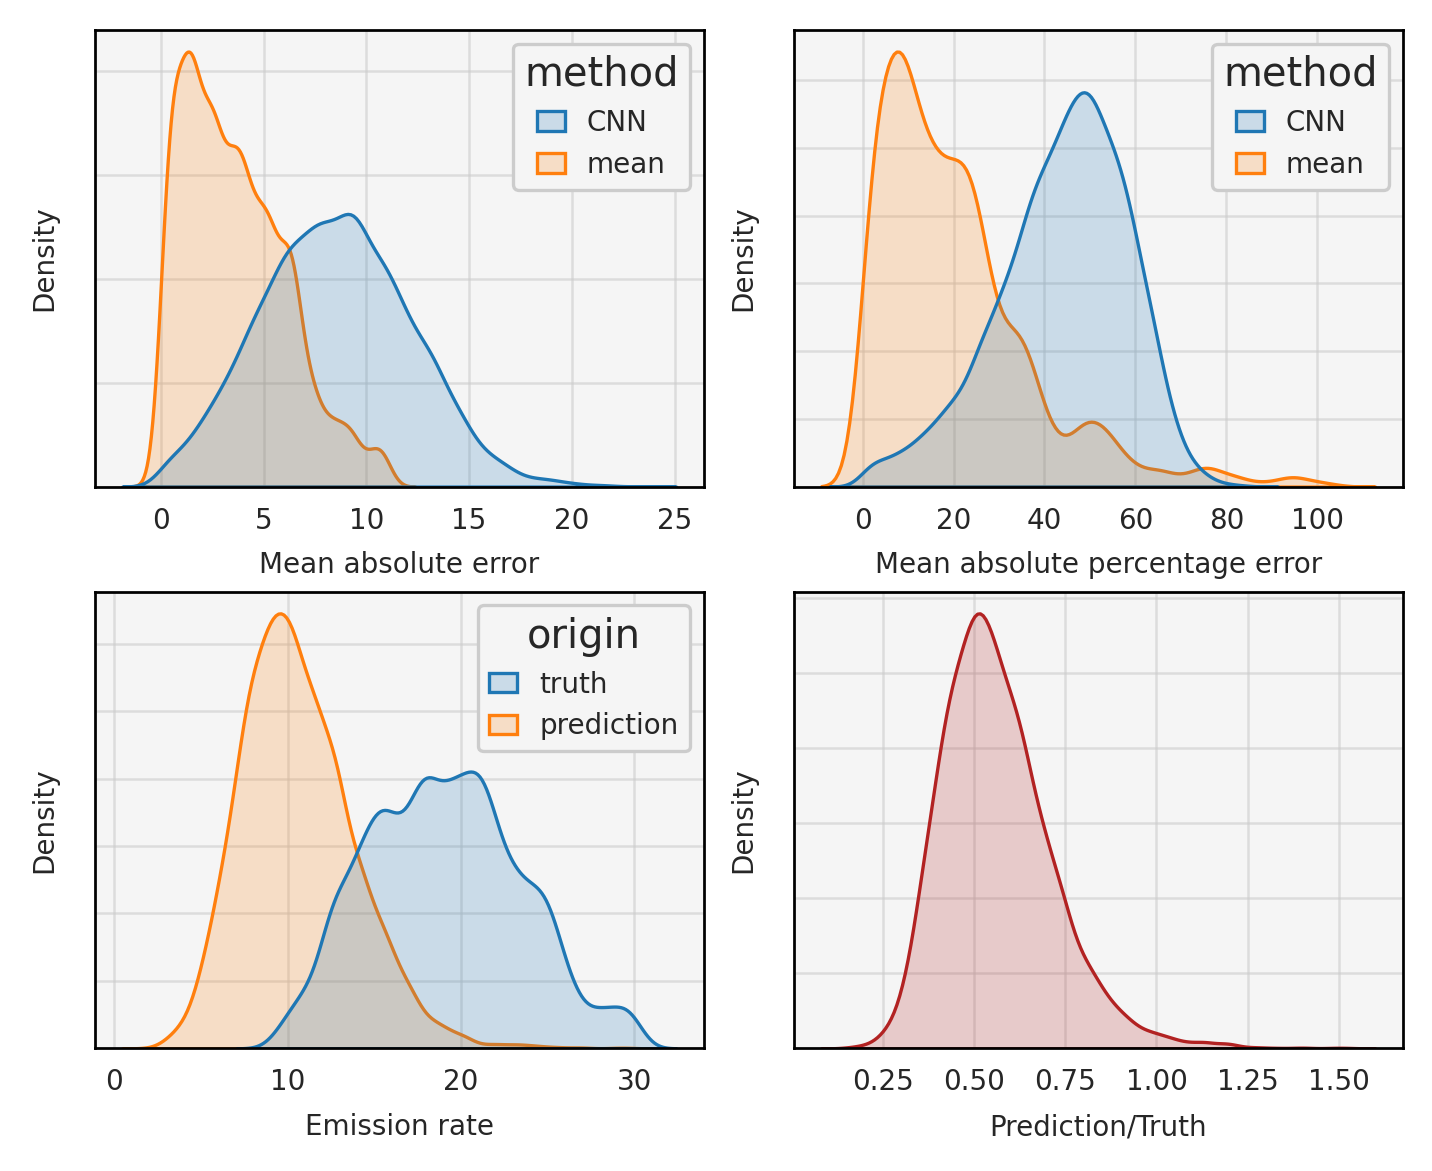

In [36]:
model_eval.get_summary_histo_inversion(model, data)

nwbce: 12.283042907714844
idx: 5027
origin: smart_2km_Box_64
time: 2015-10-13T11:00:00.000000000
emiss: [24.41655 24.61832 21.79345]

nwbce: 8.067599296569824
idx: 3134
origin: smart_2km_Box_64
time: 2015-06-28T14:00:00.000000000
emiss: [15.0963  15.49349 16.02311]

nwbce: 6.880810737609863
idx: 3665
origin: smart_2km_Box_64
time: 2015-07-28T17:00:00.000000000
emiss: [18.50069 19.53834 19.88408]

1/1 [==============================] - 0s 18ms/step


<Figure size 1920x1440 with 0 Axes>

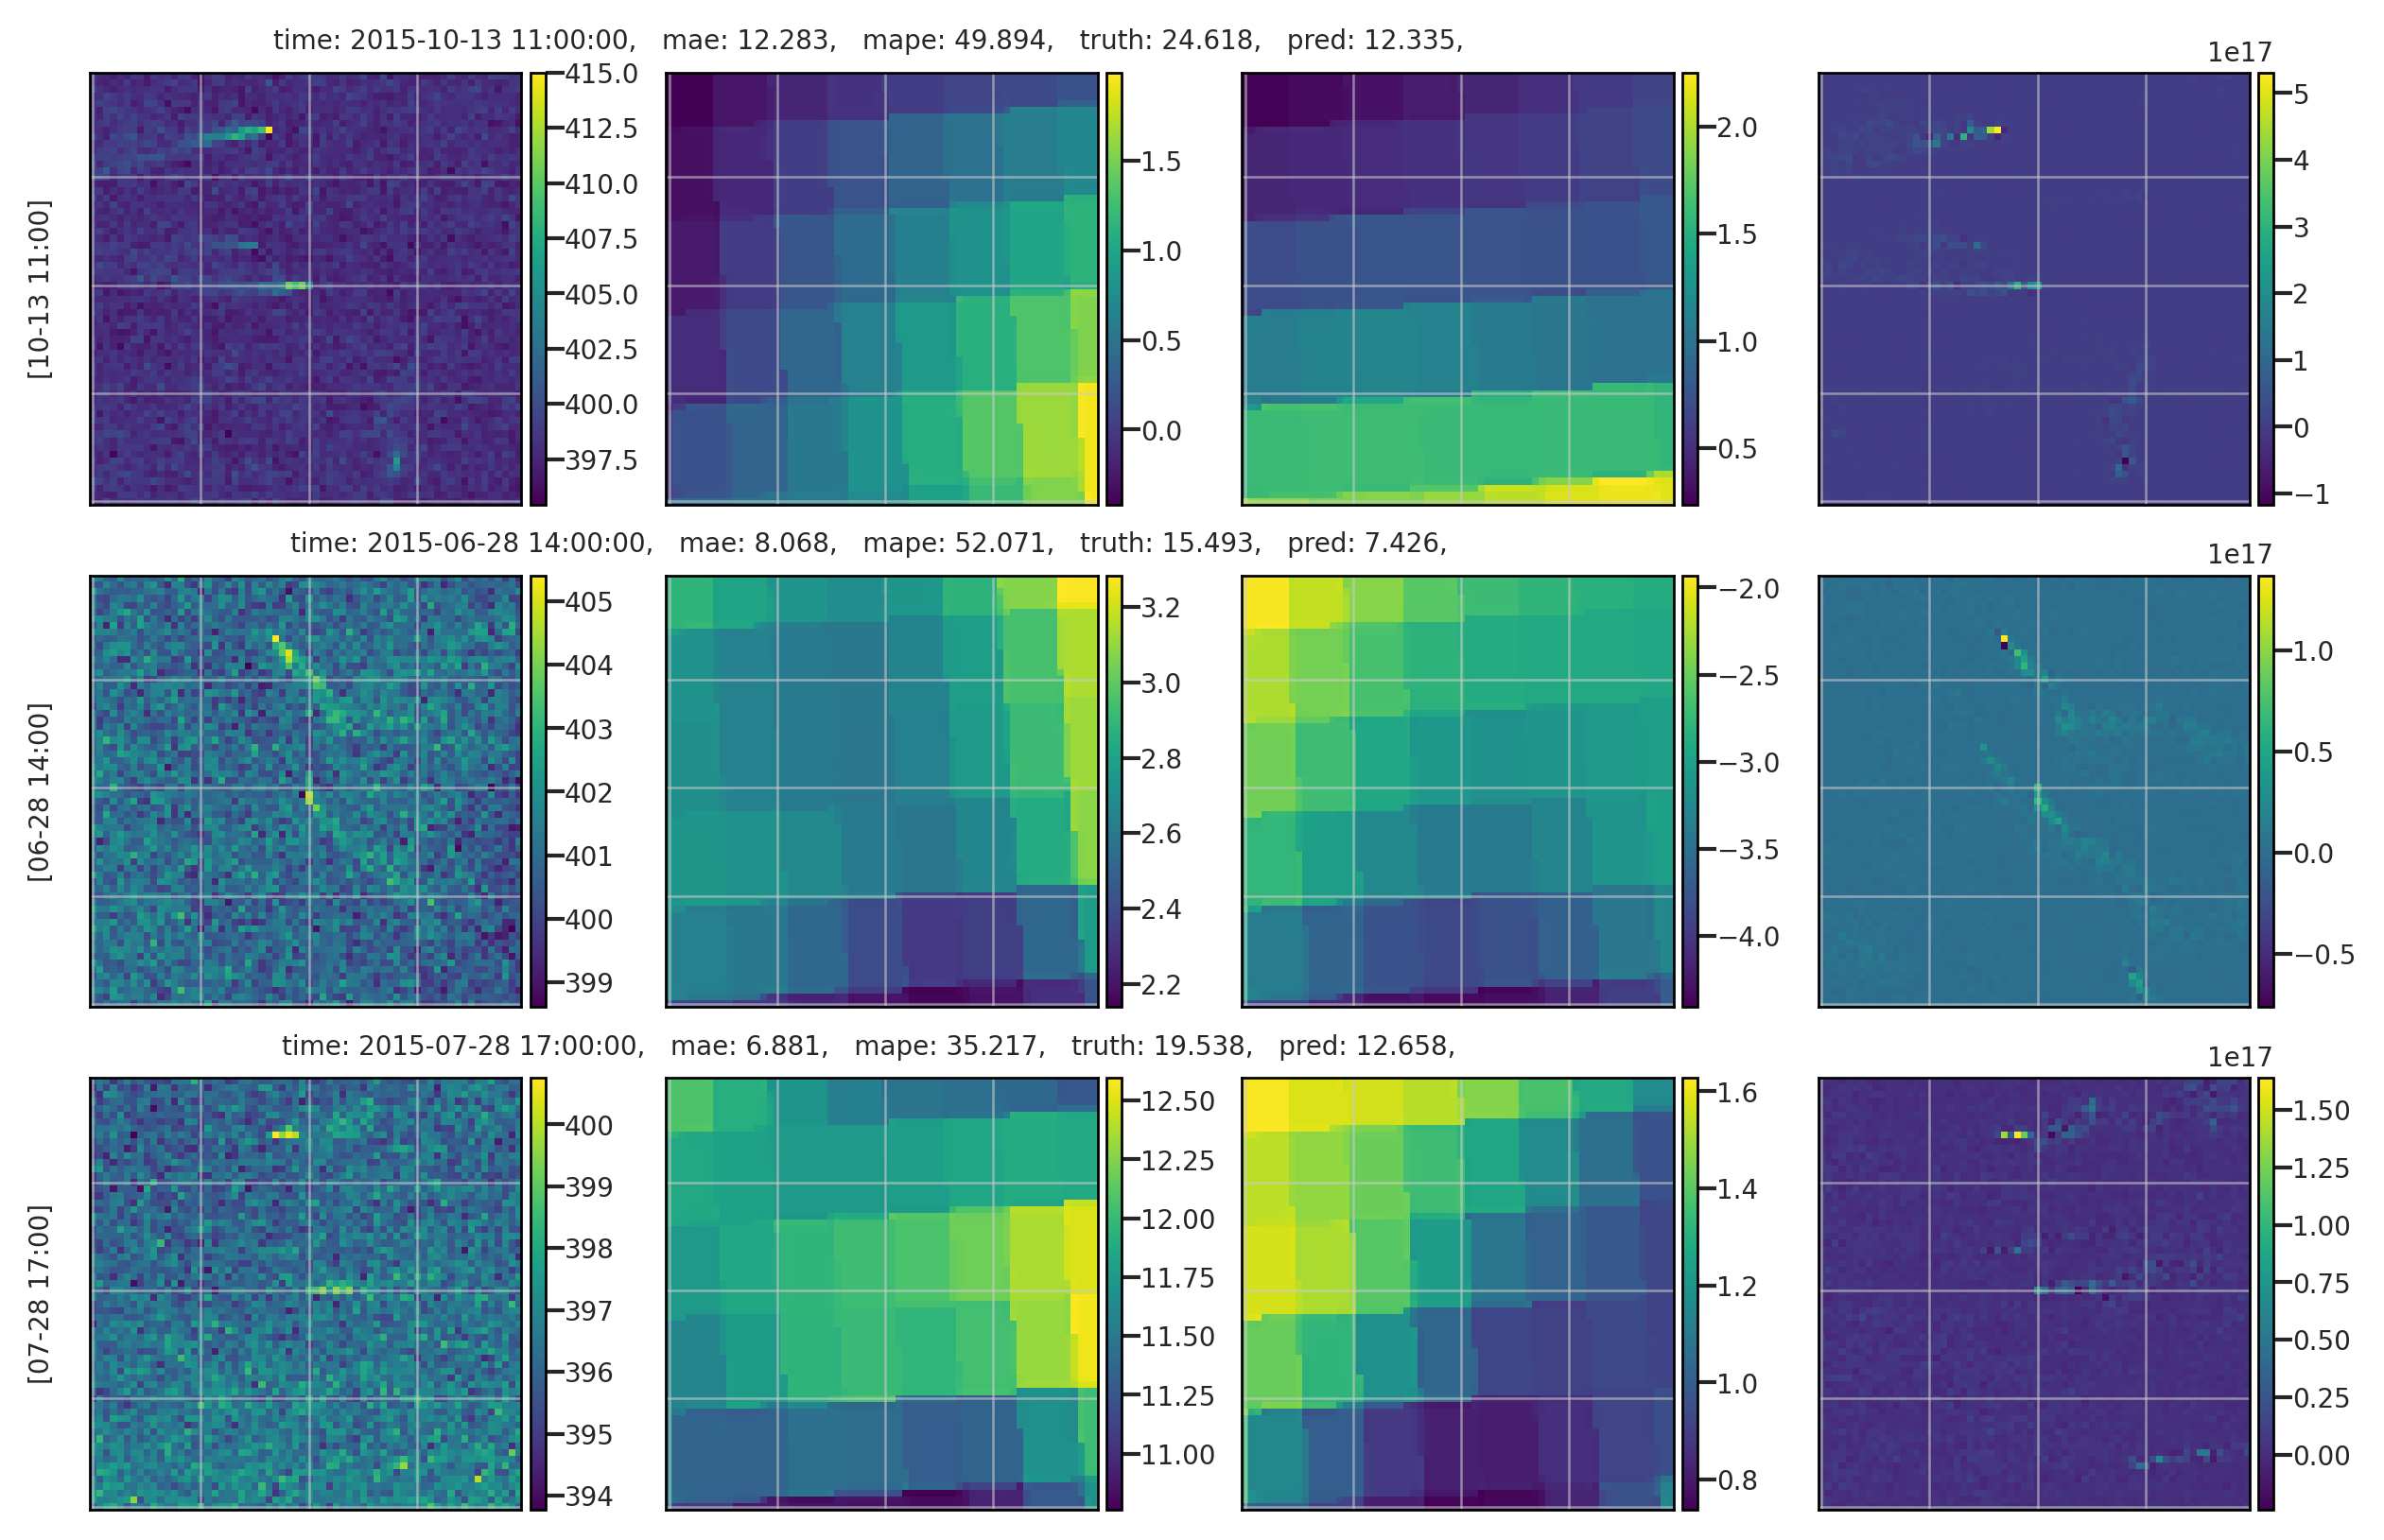

In [41]:
model_eval.plot_inversion_examples(
    data, metrics["mae"], metrics["mape"], model, fourth_col=True
)

### On validation dataset

In [14]:
data_val = model_eval.get_data_for_inversion(
    os.path.join(dir_res, name_model),
    path_valid_nc,
)

In [15]:
metrics_val = model_eval.get_inv_metrics_model_on_data(model, data_val)
print("mae:", np.mean(metrics_val["mae"]))
print("mape:", np.mean(metrics_val["mape"]))

144/144 [==============================] - 1s 4ms/step
mae: 2.9216383
mape: 24.009941


144/144 [==============================] - 1s 4ms/step


<Figure size 1920x1440 with 0 Axes>

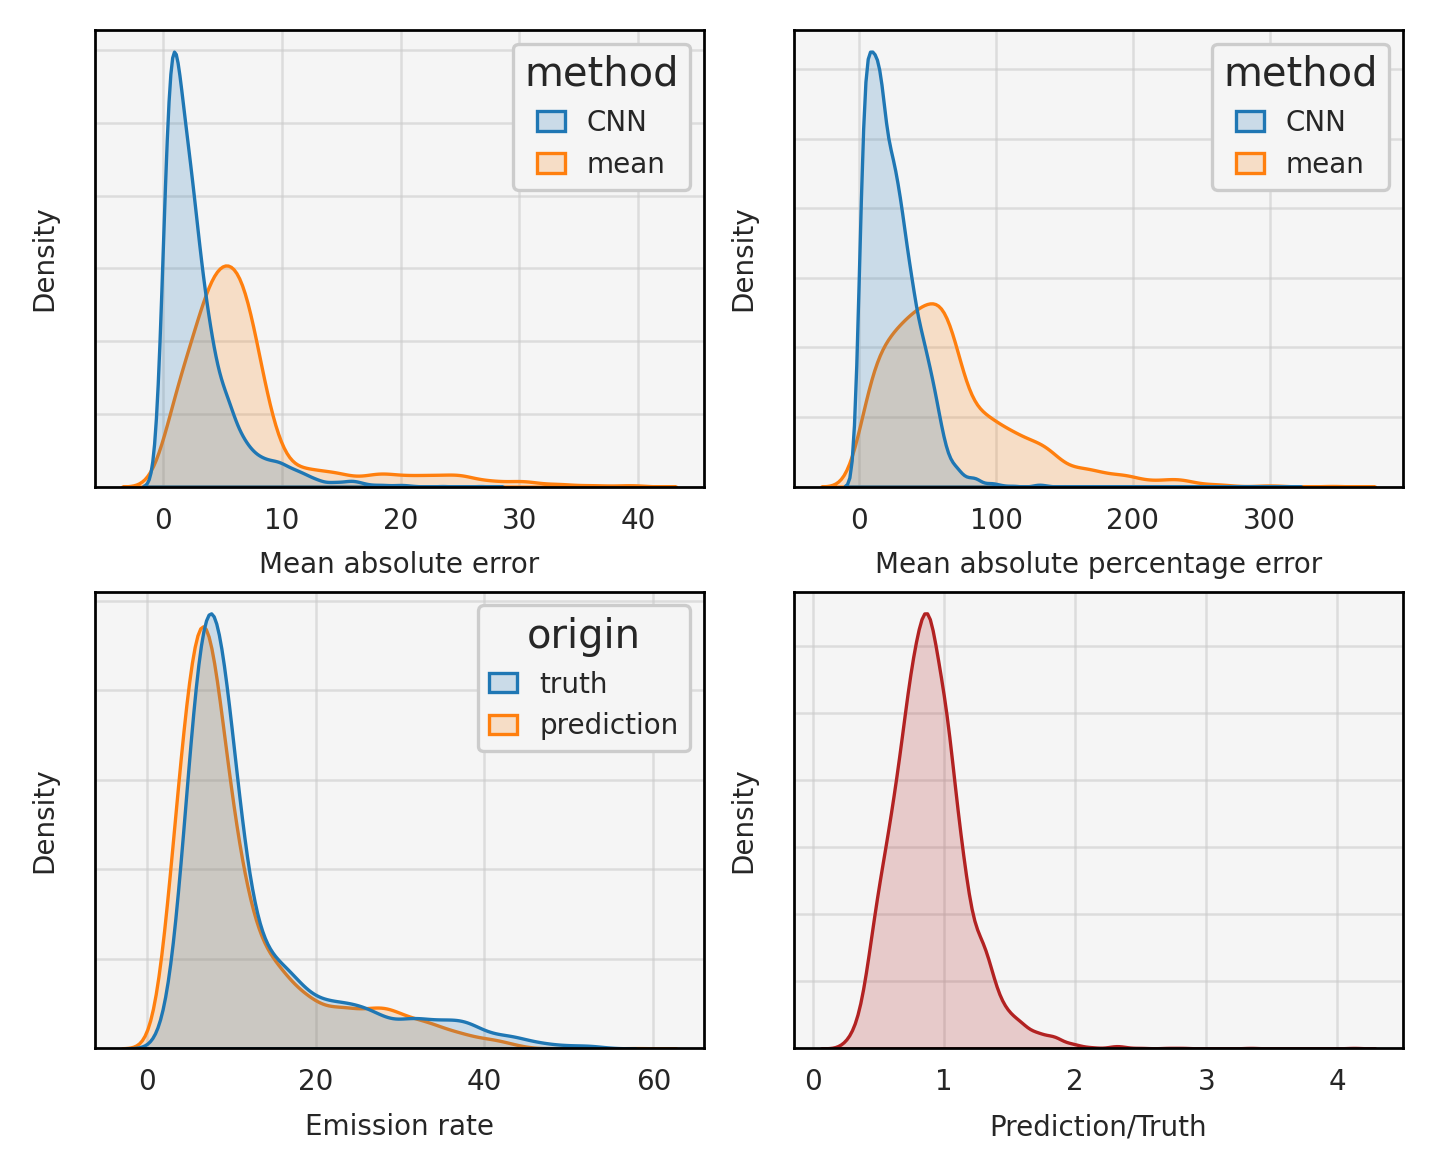

In [16]:
model_eval.get_summary_histo_inversion(model, data_val)